<a href="https://colab.research.google.com/github/Codyd2k1/House-Value-Prediction-Tool/blob/main/House_Value_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Value Prediction Tool


In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test (18).csv
Saving train.csv to train (18).csv


{'test.csv': b'id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity\r\n0,-122.36,37.94,41.0,2591.0,585.0,1638.0,462.0,1.822,NEAR BAY\r\n1,-118.37,34.16,17.0,4150.0,1148.0,1808.0,1041.0,3.5051,<1H OCEAN\r\n2,-118.29,33.95,40.0,2808.0,695.0,2357.0,627.0,1.9655,<1H OCEAN\r\n3,-121.77,38.01,13.0,2983.0,534.0,1417.0,510.0,3.9861,INLAND\r\n4,-118.26,34.08,45.0,2174.0,627.0,1992.0,557.0,2.5428,<1H OCEAN\r\n5,-121.98,37.36,33.0,1582.0,272.0,809.0,267.0,5.7059,<1H OCEAN\r\n6,-121.14,37.47,38.0,2427.0,450.0,1272.0,474.0,2.8833,INLAND\r\n7,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND\r\n8,-119.14,34.15,25.0,2202.0,390.0,1415.0,412.0,4.43,NEAR OCEAN\r\n9,-121.42,38.22,35.0,1507.0,313.0,868.0,283.0,2.0284,INLAND\r\n10,-117.91,34.1,28.0,3694.0,722.0,1999.0,718.0,3.2813,<1H OCEAN\r\n11,-117.17,33.83,7.0,77.0,12.0,64.0,15.0,4.6,INLAND\r\n12,-118.29,33.72,25.0,2469.0,584.0,1253.0,535.0,3.1932,NEAR OCEAN\r\n13,-117.43,33.93,1

**Importing Necessary Libraries:**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold

**Step 1: Load Data from CSV Files**

In [ ]:
trainingData = pd.read_csv("train.csv")
testingData = pd.read_csv("test.csv")

**Step 2: Build and train all Regression models on the training data**

Part A: Prepare Data

    It appears that we have an object we need to convert to numbers, as well as some null values to fix.

In [ ]:
print(trainingData.isnull().sum())

id                      0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        110
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [ ]:
print(testingData.isnull().sum())

id                     0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        97
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64


In [ ]:
cleanData = trainingData
cleanData = pd.get_dummies(cleanData, columns= ["ocean_proximity"])
testingData = pd.get_dummies(testingData, columns= ["ocean_proximity"])
print(np.isnan(testingData.values).sum())
#using interpolation, the replaced value will be the slope of the values outside of the replaced item
cleanData.total_bedrooms.fillna(cleanData.total_bedrooms.median(),inplace = True)
testingData.total_bedrooms.fillna(testingData.total_bedrooms.median(),inplace = True)
#cleanData.total_bedrooms.interpolate(method = 'linear', direciton = 'forward', inplace = True)
#testingData.total_bedrooms.interpolate(method = 'linear', direciton = 'forward', inplace = True)
idColumn = testingData.id
#cleanData = cleanData.drop(columns = ["longitude", "latitude"])
y = cleanData.median_house_value
X = cleanData.drop(columns = ["id", "median_house_value"])
testingData = testingData.drop(columns= ["id"])#"longitude", "latitude"] )

97


In [ ]:
print(cleanData.columns)

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [ ]:
print(testingData.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [ ]:
print(np.isnan(X.values).sum())

0


In [ ]:
print(np.isnan(y.values).sum())

0


Part B: Check for necessary features

In [ ]:
cleanData.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

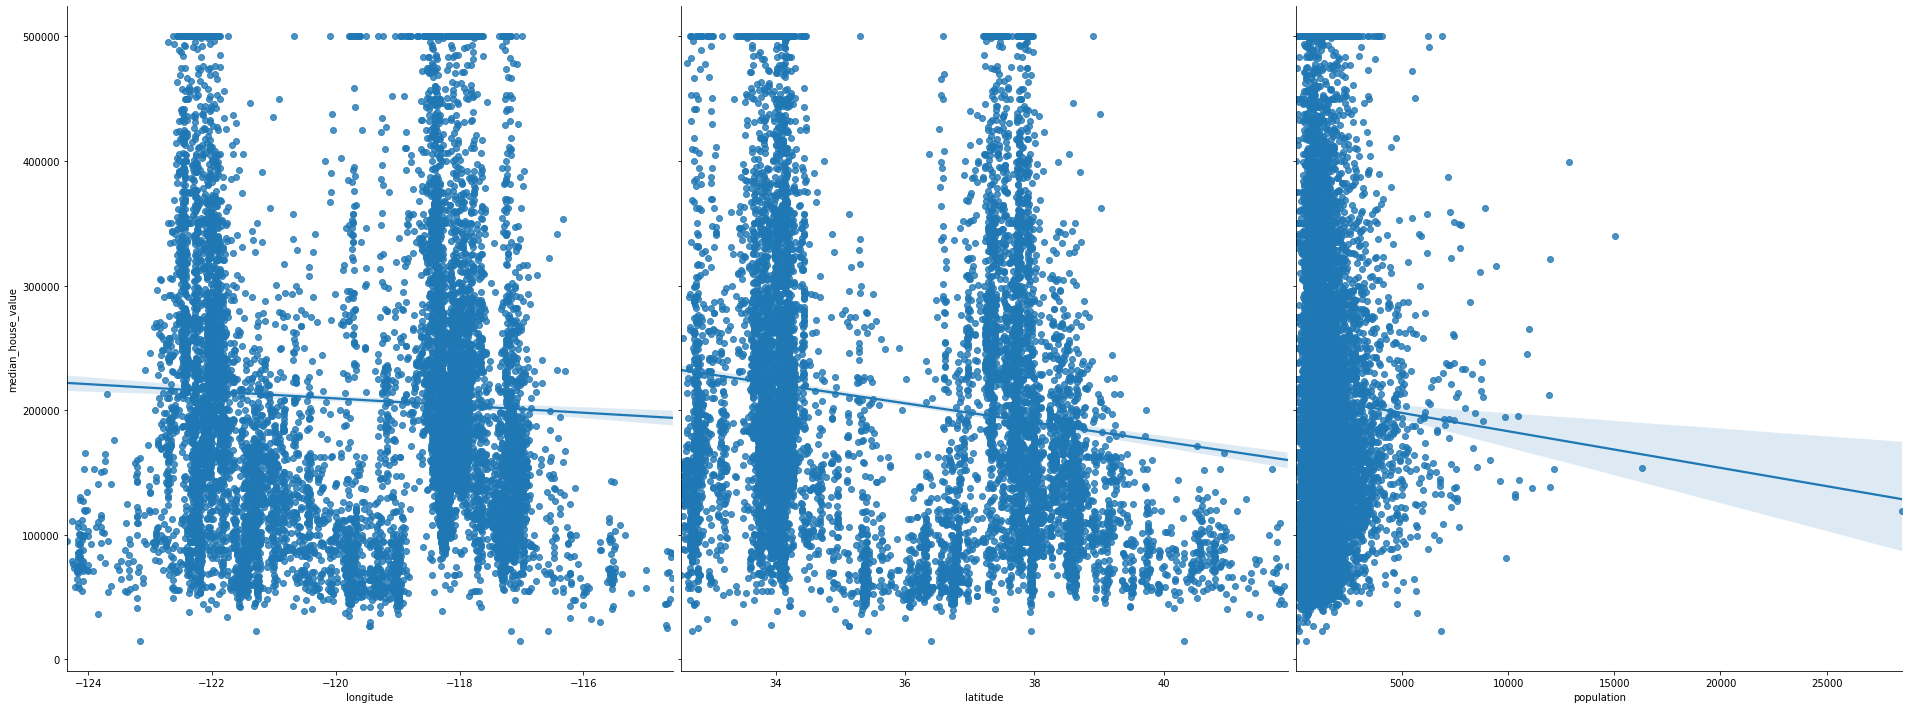

In [ ]:
sns.pairplot(trainingData, x_vars = ["longitude", "latitude", "population"], y_vars= ["median_house_value"], height = 10, aspect = .9, kind = "reg")

Part C: Initialize Models

In [ ]:
linregModel = linear_model.LinearRegression()

In [ ]:
ridgeModel = linear_model.Ridge()

In [ ]:
lassoModel = linear_model.Lasso()

In [ ]:
elasticModel = linear_model.ElasticNet()

**Step 3: Plot Sampling Distributions of RMSE**

Part A: Generate Sampling Distributions

In [ ]:
test_sizes = np.arange(.1, 1, .05)
print(test_sizes)

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95]


In [ ]:
  def get_distribution(X,y,Model):
    RMSE_scores = []
    RMSE_scores_testing = []
    for i in test_sizes:
      X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = i)
      Model = Model.fit(X_train, y_train)
      predictions_testing = linregModel.predict(X_test)
      predictions_training = linregModel.predict(X_train)
      RMSE_scores_testing.append(sqrt(mean_squared_error(y_test, predictions_testing)))
      RMSE_scores.append(sqrt(mean_squared_error(y_train, predictions_training)))
    training_scores = pd.DataFrame({"Training_RMSE_Scores":RMSE_scores})#"testing_f1_scores":testing_f1_scores})
    testing_scores = pd.DataFrame({"Testing_RMSE_Scores":RMSE_scores_testing})
    return training_scores, testing_scores

In [ ]:
linregModelTrainingScores, linregModelTestingScores = get_distribution(X,y,linregModel)

In [ ]:
ridgeModelTrainingScores, ridgeModelTestingScores = get_distribution(X,y,ridgeModel)

In [ ]:
lassoModelTrainingScores, lassoModelTestingScores = get_distribution(X,y,lassoModel)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3611575631062.746, tolerance: 12452698619.472477
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3351902342698.832, tolerance: 11726020160.832848
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15523489366121.72, tolerance: 10989109655.65792
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2909267701

In [ ]:
elasticModelTrainingScores, elasticModelTestingScores = get_distribution(X,y,elasticModel)

In [ ]:
linregModelTrainingScores["Test_Sizes"] = test_sizes
ridgeModelTrainingScores["Test_Sizes"] = test_sizes
lassoModelTrainingScores["Test_Sizes"] = test_sizes
elasticModelTrainingScores["Test_Sizes"] = test_sizes
linregModelTestingScores["Test_Sizes"] = test_sizes
ridgeModelTestingScores["Test_Sizes"] = test_sizes
lassoModelTestingScores["Test_Sizes"] = test_sizes
elasticModelTestingScores["Test_Sizes"] = test_sizes

Part B: Plotting Distributions

Text(0.5, 1.0, 'Linear Regression Training Distribution')

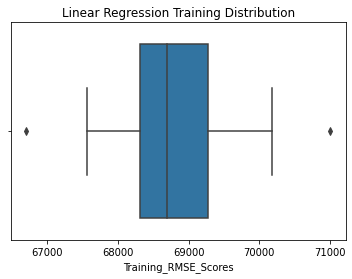

In [ ]:
sns.boxplot(x = linregModelTrainingScores["Training_RMSE_Scores"]).set_title("Linear Regression Training Distribution")

Text(0.5, 1.0, 'Linear Regression Testing Distribution')

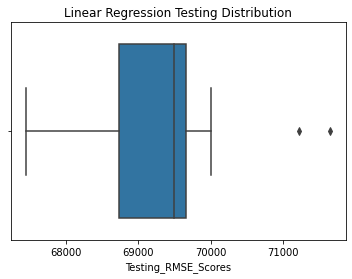

In [ ]:
sns.boxplot(x = linregModelTestingScores["Testing_RMSE_Scores"]).set_title("Linear Regression Testing Distribution")

Text(0.5, 1.0, 'Ridge Regression Training Distribution')

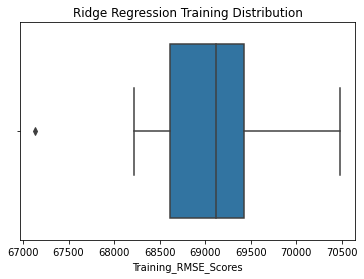

In [ ]:
sns.boxplot(x = ridgeModelTrainingScores["Training_RMSE_Scores"]).set_title("Ridge Regression Training Distribution")

Text(0.5, 1.0, 'Ridge Regression Testing Distribution')

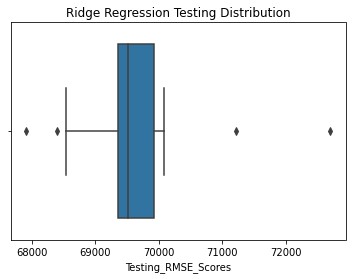

In [ ]:
sns.boxplot(x = ridgeModelTestingScores["Testing_RMSE_Scores"]).set_title("Ridge Regression Testing Distribution")

Text(0.5, 1.0, 'Lasso Regression Training Distribution')

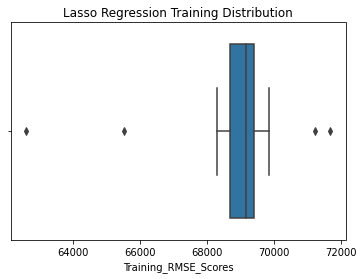

In [ ]:
sns.boxplot(x = lassoModelTrainingScores["Training_RMSE_Scores"]).set_title("Lasso Regression Training Distribution")

Text(0.5, 1.0, 'Lasso Regression Testing Distribution')

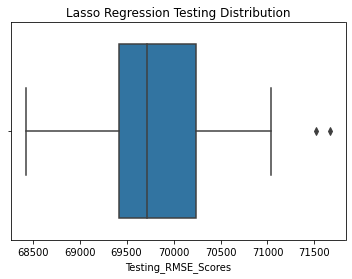

In [ ]:
sns.boxplot(x = lassoModelTestingScores["Testing_RMSE_Scores"]).set_title("Lasso Regression Testing Distribution")

Text(0.5, 1.0, 'Elastic Regression Training Distribution')

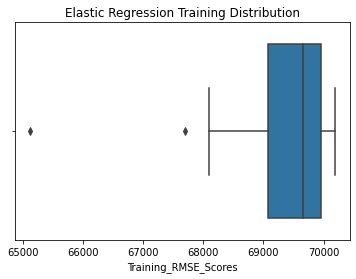

In [ ]:
sns.boxplot(x = elasticModelTrainingScores["Training_RMSE_Scores"]).set_title("Elastic Regression Training Distribution")

Text(0.5, 1.0, 'Elastic Regression Testing Distribution')

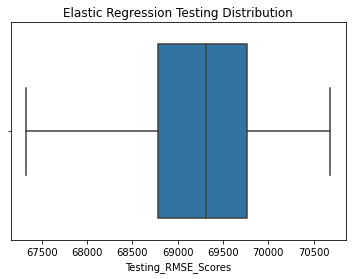

In [ ]:
sns.boxplot(x = elasticModelTestingScores["Testing_RMSE_Scores"]).set_title("Elastic Regression Testing Distribution")

In [ ]:
print(linregModelTestingScores)

    Testing_RMSE_Scores  Test_Sizes
0          71654.699015        0.10
1          71219.103507        0.15
2          68327.041136        0.20
3          69491.517496        0.25
4          67441.709589        0.30
5          68955.455796        0.35
6          69756.751006        0.40
7          68268.266663        0.45
8          69595.989002        0.50
9          68732.024750        0.55
10         69244.185580        0.60
11         69663.622278        0.65
12         68578.390703        0.70
13         69540.398000        0.75
14         68743.765042        0.80
15         69663.736653        0.85
16         70009.311213        0.90
17         69502.250887        0.95


In [ ]:
print(min(linregModelTestingScores.Testing_RMSE_Scores))

67441.70958931264


In [ ]:
print(ridgeModelTestingScores)

    Testing_RMSE_Scores  Test_Sizes
0          71226.732717        0.10
1          69327.879570        0.15
2          72704.885239        0.20
3          69460.041817        0.25
4          70002.845053        0.30
5          67912.075771        0.35
6          68408.724804        0.40
7          69953.626278        0.45
8          70088.991527        0.50
9          68535.647545        0.55
10         69188.779033        0.60
11         69866.249761        0.65
12         69460.932772        0.70
13         69570.526524        0.75
14         69498.563481        0.80
15         69810.084047        0.85
16         69547.741057        0.90
17         69471.929236        0.95


In [ ]:
print(min(ridgeModelTestingScores.Testing_RMSE_Scores))

67912.07577128196


In [ ]:
print(lassoModelTestingScores)

    Testing_RMSE_Scores  Test_Sizes
0          71513.021875        0.10
1          71032.541332        0.15
2          70264.990046        0.20
3          71668.213358        0.25
4          70307.058539        0.30
5          69417.461643        0.35
6          69537.720069        0.40
7          69232.475563        0.45
8          68988.964919        0.50
9          70131.068391        0.55
10         70145.742940        0.60
11         68429.032151        0.65
12         69675.399750        0.70
13         68643.427824        0.75
14         69569.877788        0.80
15         70078.702281        0.85
16         69431.322134        0.90
17         69756.201602        0.95


In [ ]:
print(min(lassoModelTestingScores.Testing_RMSE_Scores))

68429.03215083366


In [ ]:
print(elasticModelTestingScores)

    Testing_RMSE_Scores  Test_Sizes
0          70643.842756        0.10
1          68788.514778        0.15
2          67326.586227        0.20
3          69814.260005        0.25
4          70683.821032        0.30
5          68398.068995        0.35
6          68289.384472        0.40
7          68856.046472        0.45
8          68758.487061        0.50
9          68782.774170        0.55
10         70278.353416        0.60
11         69636.479023        0.65
12         69161.832964        0.70
13         69268.939664        0.75
14         69839.579147        0.80
15         69351.860129        0.85
16         69420.913214        0.90
17         69634.338939        0.95


In [ ]:
print(min(elasticModelTestingScores.Testing_RMSE_Scores))

67326.5862268369


**Step 4: Predict Target Vector**

In [ ]:
new_test_sizes =  np.arange(.25, .35, .01)
print(new_test_sizes)

[0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34]


In [ ]:
def fine_tune_model(Model):
  RMSE_score_array = [] 
  #heh i get to use global variables
  for i in new_test_sizes:
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = i)
    Model = Model.fit(X_train, y_train)
    predictions = Model.predict(X_test)
    RMSE_score_array.append(sqrt(mean_squared_error(y_test,predictions)))
  return pd.DataFrame({"RMSE_Scores":RMSE_score_array})

In [ ]:
newScores = fine_tune_model(linregModel)

In [ ]:
newScores["Test_Sizes"] = new_test_sizes
print(newScores)

    RMSE_Scores  Test_Sizes
0  68948.952033        0.25
1  69274.228903        0.26
2  67663.210957        0.27
3  69275.354492        0.28
4  70117.872771        0.29
5  70570.178821        0.30
6  70218.637860        0.31
7  68878.916943        0.32
8  69679.132461        0.33
9  69687.267774        0.34


I will be using a test size of .30 and a Linear Regression model.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .30)

In [ ]:
print(X.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [ ]:
finalModel = linear_model.LinearRegression()
finalModel.fit(X_train,y_train)
predictions = finalModel.predict(testingData)
output = pd.DataFrame({'id': idColumn, "median_house_value":predictions})
output.head()
output.to_csv("as4_codys_submission.csv", index = False)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(output)

          id  median_house_value
0          0       156491.729850
1          1       261101.095812
2          2       149022.469207
3          3       166047.466760
4          4       180295.005188
5          5       308249.114692
6          6       147759.385276
7          7       109945.572133
8          8       254364.395786
9          9        94185.399900
10        10       192171.625380
11        11       158429.876556
12        12       222628.247616
13        13       131157.545845
14        14       252857.109914
15        15       222612.264315
16        16       372385.659298
17        17       122845.250871
18        18       145203.962475
19        19       269142.284710
20        20       315866.674386
21        21       495727.153316
22        22       101362.421128
23        23        66030.052216
24        24       169722.656941
25        25       155614.182914
26        26       126308.389482
27        27       296968.020320
28        28       142064.484240
29        

# Final RMSE Score: 68535.77424!